# Astronomical Object Classifier - Playground

This notebook tests the data loaders with different preprocessing strategies.


## Imports


In [16]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import transforms

from data_loader import AstronomicalObjectDataLoader
from preprocessors import get_resize_preprocessor, get_salient_features_preprocessor

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Configuration


In [17]:
DATA_PATH = Path("data")
BATCH_SIZE = 8
NUM_WORKERS = 2

## Test 1: Simple Resize Preprocessor


In [5]:
# Create simple resize preprocessor
simple_preprocessor = get_resize_preprocessor(
    output_size=(224, 224),
)

# Create data loader
simple_loader = AstronomicalObjectDataLoader(
    data_path=DATA_PATH,
    preprocessor=simple_preprocessor,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS
)

print(f"Number of classes: {simple_loader.get_num_classes()}")
print(f"Label mapping: {simple_loader.get_label_mapping()}")

Loaded label mapping from assets/label_mapping.csv
Created training dataloader with 2416 samples
Created validation dataloader with 658 samples
Created test dataloader with 345 samples
Number of classes: 12
Label mapping: {'asteroid': 0, 'black_hole': 1, 'earth': 2, 'galaxy': 3, 'jupiter': 4, 'mars': 5, 'mercury': 6, 'neptune': 7, 'pluto': 8, 'saturn': 9, 'uranus': 10, 'venus': 11}


In [7]:
# Get a batch
train_loader = simple_loader.get_dataloader('training')
features, labels = next(iter(train_loader))

print(f"Batch shape: {features.shape}")  # Should be [batch_size, 3, 224, 224]
print(f"Labels: {labels}")
print(f"Label shape: {labels.shape}")

Batch shape: torch.Size([8, 3, 224, 224])
Labels: tensor([ 3,  0,  3,  4, 11,  1,  9,  9])
Label shape: torch.Size([8])


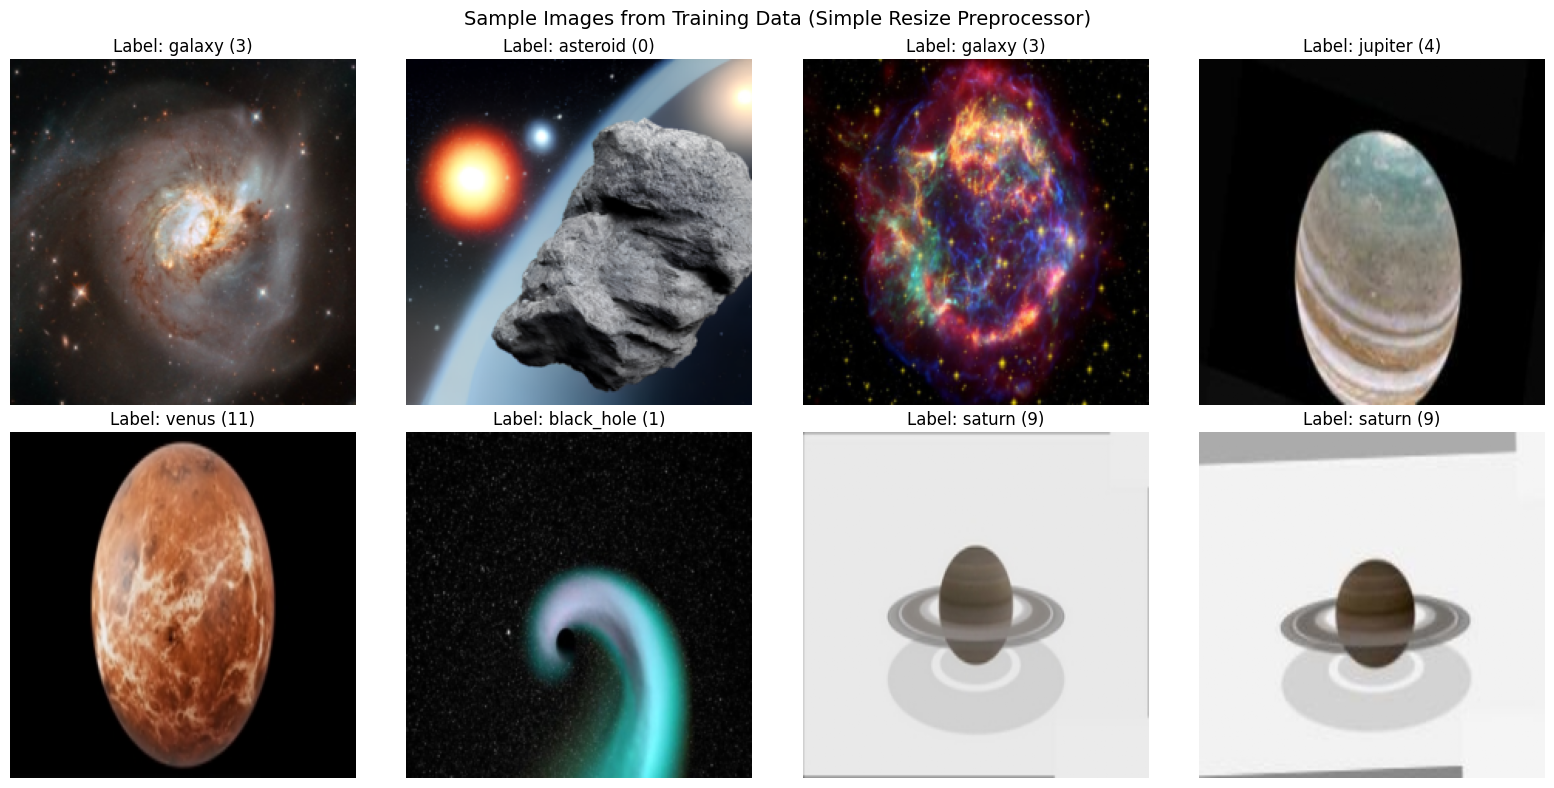

In [8]:
# Visualize a few images
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle("Sample Images from Training Data (Simple Resize Preprocessor)", fontsize=14)

label_mapping = simple_loader.get_label_mapping()
reverse_mapping = {v: k for k, v in label_mapping.items()}

for i in range(min(8, BATCH_SIZE)):
    row, col = i // 4, i % 4
    
    # Convert tensor to numpy for visualization
    img = features[i].permute(1, 2, 0).numpy()  # [H, W, C]
    # Clip to [0, 1] range
    img = np.clip(img, 0, 1)
    
    axes[row, col].imshow(img)
    axes[row, col].set_title(f"Label: {reverse_mapping.get(labels[i].item(), 'Unknown')} ({labels[i].item()})")
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

## Test 2: Salient Features Preprocessor

In [18]:
# Create salient features preprocessor
features_preprocessor = get_salient_features_preprocessor(grid_size=(32, 32))

# Create data loader
features_loader = AstronomicalObjectDataLoader(
    data_path=DATA_PATH,
    preprocessor=features_preprocessor,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS
)

print(f"Number of classes: {features_loader.get_num_classes()}")

Loaded label mapping from assets/label_mapping.csv
Created training dataloader with 2416 samples
Created validation dataloader with 658 samples
Created test dataloader with 345 samples
Number of classes: 12


In [19]:
# Get a batch
train_loader_features = features_loader.get_dataloader('training')
features_batch, labels_batch = next(iter(train_loader_features))

print(f"Batch shape: {features_batch.shape}")  # Should be [batch_size, n_features]
print(f"Number of features per sample: {features_batch.shape[1]}")
print(f"Labels: {labels_batch}")
print(f"Label shape: {labels_batch.shape}")

Batch shape: torch.Size([8, 600])
Number of features per sample: 600
Labels: tensor([ 3,  2,  1,  2,  0, 10,  3,  5])
Label shape: torch.Size([8])


In [21]:
# Print feature details for first sample
print(f"Feature vector for first sample:")
print(features_batch[0])
print(f"\nFirst 10 features: {features_batch[0][:10].numpy()}")

Feature vector for first sample:
tensor([0.1202, 0.1240, 0.1390, 0.1651, 0.1759, 0.1917, 0.1278, 1.0000, 0.0039,
        0.0817, 0.8549, 0.0196, 0.0719, 0.0815, 0.8824, 0.0196, 0.0746, 0.0982,
        0.9647, 0.0157, 0.0934, 0.0588, 0.7020, 0.0235, 0.0436, 0.0564, 0.5804,
        0.0235, 0.0398, 0.0621, 0.5294, 0.0196, 0.0458, 0.0738, 0.8706, 0.0235,
        0.0586, 0.0701, 0.7294, 0.0235, 0.0462, 0.0766, 0.6510, 0.0275, 0.0479,
        0.0660, 0.4000, 0.0275, 0.0353, 0.0664, 0.4392, 0.0275, 0.0375, 0.0765,
        0.5176, 0.0314, 0.0492, 0.0463, 0.3255, 0.0118, 0.0202, 0.0463, 0.3020,
        0.0118, 0.0213, 0.0503, 0.3020, 0.0157, 0.0286, 0.0376, 0.6510, 0.0078,
        0.0336, 0.0371, 0.5765, 0.0078, 0.0328, 0.0378, 0.6667, 0.0078, 0.0422,
        0.0420, 0.7647, 0.0078, 0.0613, 0.0416, 0.8039, 0.0078, 0.0584, 0.0405,
        0.8824, 0.0078, 0.0672, 0.2475, 0.5804, 0.0471, 0.1511, 0.2664, 0.7529,
        0.0471, 0.1872, 0.3243, 0.9882, 0.0431, 0.2313, 0.1077, 0.8902, 0.0196,
       

/var/folders/z8/1d183zgx3c11zg5s3n3byg700000gn/T/ipykernel_70246/1807079650.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([features_batch[i].numpy() for i in range(features_batch.shape[0])], labels=[f"Sample {i}" for i in range(features_batch.shape[0])])


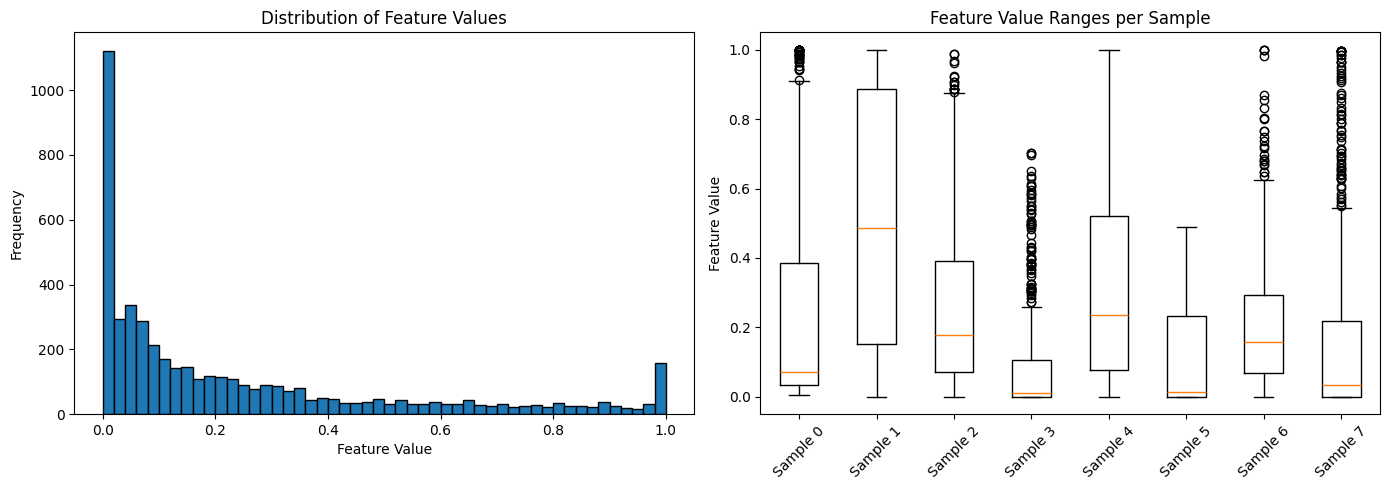

In [ ]:
# Visualize feature statistics
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot feature value distribution
all_features = features_batch.flatten().numpy()
axes[0].hist(all_features, bins=50, edgecolor='black')
axes[0].set_title("Distribution of Feature Values")
axes[0].set_xlabel("Feature Value")
axes[0].set_ylabel("Frequency")

# Plot feature value ranges per sample
axes[1].boxplot([features_batch[i].numpy() for i in range(features_batch.shape[0])], labels=[f"Sample {i}" for i in range(features_batch.shape[0])])
axes[1].set_title("Feature Value Ranges per Sample")
axes[1].set_ylabel("Feature Value")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Summary Statistics


In [22]:
print("Dataset Summary:")
print("=" * 50)

label_mapping = features_loader.get_label_mapping()
for split in ['training', 'validation', 'test']:
    dataset = features_loader.get_dataset(split)
    if dataset is not None:
        print(f"{split.capitalize()}: {len(dataset)} samples")
    else:
        print(f"{split.capitalize()}: Not available")

Dataset Summary:
Training: 2416 samples
Validation: 658 samples
Test: 345 samples


In [24]:
print("\nClass Distribution:")
print("=" * 50)

train_dataset = features_loader.get_dataset('training')
if train_dataset is not None:
    # Count samples per class
    class_counts = {}
    for _, label in train_dataset.samples:
        for class_name, class_label in label_mapping.items():
            if class_label == label:
                class_counts[class_name] = class_counts.get(class_name, 0) + 1
                break
    
    for class_name, count in sorted(class_counts.items()):
        print(f"{class_name}: {count} samples")


Class Distribution:
asteroid: 212 samples
black_hole: 185 samples
earth: 209 samples
galaxy: 185 samples
jupiter: 202 samples
mars: 215 samples
mercury: 201 samples
neptune: 202 samples
pluto: 201 samples
saturn: 201 samples
uranus: 202 samples
venus: 201 samples


## Data Loading Speed Test


In [26]:
import time

def test_dataloader_speed(loader, num_batches=8):
    train_loader = loader.get_dataloader('training')
    
    start_time = time.time()
    batch_count = 0
    
    for features, labels in train_loader:
        batch_count += 1
        if batch_count >= num_batches:
            break
    
    elapsed_time = time.time() - start_time
    avg_time = elapsed_time / num_batches
    
    return elapsed_time, avg_time

# Test both preprocessors
print("Testing data loading speed...")
print("=" * 50)

print("\nSimple resize preprocessor:")
total_time, avg_time = test_dataloader_speed(simple_loader, num_batches=128)
print(f"Total time for 128 batches: {total_time:.2f} seconds")
print(f"Average time per batch: {avg_time:.2f} seconds")

print("\nSalient features preprocessor:")
total_time, avg_time = test_dataloader_speed(features_loader, num_batches=128)
print(f"Total time for 128 batches: {total_time:.2f} seconds")
print(f"Average time per batch: {avg_time:.2f} seconds")

Testing data loading speed...

Simple resize preprocessor:
Total time for 128 batches: 5.90 seconds
Average time per batch: 0.05 seconds

Salient features preprocessor:
Total time for 128 batches: 6.63 seconds
Average time per batch: 0.05 seconds
